In [3]:
import numpy as np
import pandas as pd
import talib as tb
from pandas_datareader.data import get_data_yahoo
import yfinance
import datetime as dt
import matplotlib.pyplot as plt

yfinance.pdr_override()

In [4]:
company = "TATAMOTORS.NS"
tm_data = get_data_yahoo("TATAMOTORS.NS")

[*********************100%***********************]  1 of 1 completed


In [5]:
tm_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-24,410.000000,424.000000,410.000000,422.149994,422.149994,30197475
2023-01-25,423.750000,427.250000,417.700012,419.049988,419.049988,22975581
2023-01-27,438.000000,453.399994,435.149994,445.600006,445.600006,63360467
2023-01-30,445.600006,450.000000,437.649994,443.649994,443.649994,18316743
2023-02-01,456.799988,456.799988,450.399994,452.350006,452.350006,3421683


In [6]:
data = tm_data.copy()
data['SMA_100'] = tb.SMA(data['Close'],100)

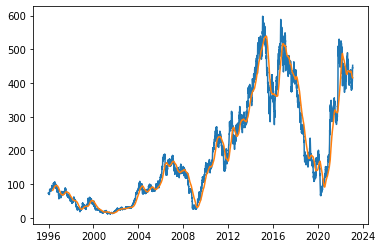

In [7]:
plt.plot(data['Close'])
plt.plot(data['SMA_100'])



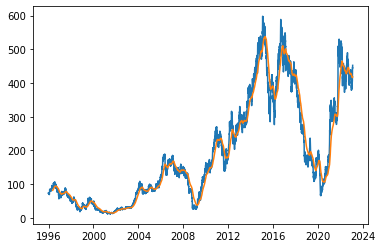

In [8]:
data['EMA_100'] = tb.EMA(data['Close'],100)
plt.plot(data['Close'])
plt.plot(data['EMA_100'])
plt.savefig(f"EMA_100 {company}.jpg")

In [9]:
data['RSI'] = tb.RSI(data['Close'])


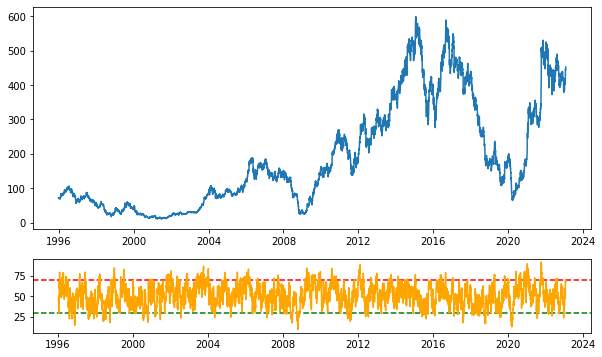

In [10]:
fig,axs = plt.subplots(2,1,gridspec_kw={"height_ratios":[3,1]},figsize=(10,6))
axs[0].plot(data['Close'])
axs[1].axhline(y=70,color="r",linestyle="--")
axs[1].axhline(y=30,color="g",linestyle="--")
axs[1].plot(data['RSI'],color="orange")
plt.savefig(f"RSI {company}.jpg")



In [19]:
data['LINEARREG'] = tb.LINEARREG(data['Close'],200)

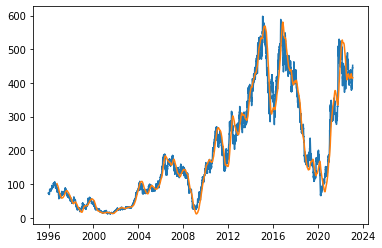

In [20]:
plt.plot(data['Close'])
plt.plot(data['LINEARREG'])
plt.savefig(f"Linear Regression {company}.jpg")


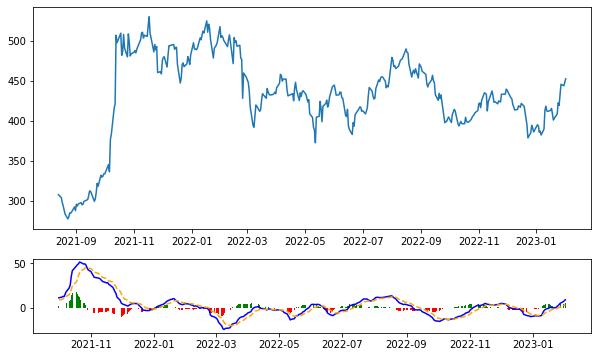

In [25]:
newdata = data['Close'][-365:]

macd, macd_signal, macd_hist = tb.MACD(newdata)

fig,axs = plt.subplots(2,1,gridspec_kw={"height_ratios":[3,1]},figsize=(10,6))

c = ["red" if cl<0 else "green" for cl in macd_hist ]

axs[0].plot(newdata)
axs[1].plot(macd,"b-")
axs[1].plot(macd_signal,'--',color="orange")
axs[1].bar(macd_hist.index,macd_hist,color=c)
plt.savefig(f"MACD {company}.jpg")

In [23]:
newdata

Date
2021-08-13    307.250000
2021-08-16    303.700012
2021-08-17    297.700012
2021-08-18    293.350006
2021-08-20    283.100006
                 ...    
2023-01-24    422.149994
2023-01-25    419.049988
2023-01-27    445.600006
2023-01-30    443.649994
2023-02-01    452.350006
Name: Close, Length: 365, dtype: float64